# Importing Importnt Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import operator

# Exploring and Redefining 

In [4]:
df = pd.read_csv('bottle.csv', low_memory = False)

In [5]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_req = df[['T_degC', 'Salnty']]

In [8]:
df_req

,T_degC,Salnty
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [38]:
df_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Salinity     500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
df_req.describe()

,T_degC,Salnty
count,853900.000000,817509.000000
mean,10.799677,33.840350
std,4.243825,0.461843
min,1.440000,28.431000
25%,7.680000,33.488000
50%,10.060000,33.863000
75%,13.880000,34.196900
max,31.140000,37.034000


# Handling Null Values

In [10]:
df_req.isnull().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [11]:
df_req = df_req[:][:500]

In [12]:
df_req.isnull().sum()

T_degC    1
Salnty    6
dtype: int64

In [13]:
df_req.fillna(method = 'ffill', inplace = True)

D:\Ansys\ipykernel_11948\4067177771.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_req.fillna(method = 'ffill', inplace = True)


In [14]:
df_req.columns = ['Temperature', 'Salinity']

In [15]:
df_req

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
495,4.90,34.269
496,4.50,34.310
497,4.48,34.311
498,4.21,34.319


In [23]:
df_req.isnull().sum()

Temperature    0
Salinity       0
dtype: int64

In [28]:
df_req.describe()

,Temperature,Salinity
count,500.000000,500.000000
mean,7.850680,33.622440
std,2.908671,0.561938
min,2.780000,32.630000
25%,5.035000,33.057750
50%,8.170000,33.788500
75%,10.450000,34.130000
max,12.660000,34.450000


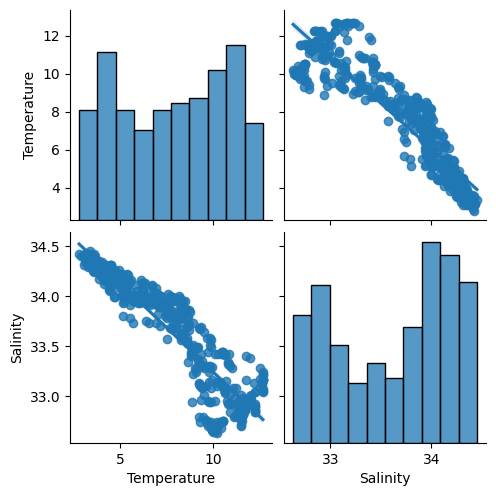

In [16]:
sns.pairplot(df_req, kind = 'reg')

# Features selection

In [17]:
X = np.array(df_req['Salinity']).reshape(-1, 1)
y = np.array(df_req['Temperature']).reshape(-1, 1)

# Linear Regression

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lin_df = LinearRegression()

In [47]:
lin_df.fit(X_train, y_train) 

LinearRegression()

In [49]:
y_predict = lin_df.predict(X_test)

In [57]:
accuracy_score = lin_df.score(X_test, y_test)

In [58]:
print('accuracy score is:' + "{:.1%}".format(accuracy_score))

accuracy score is:82.7%


In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
print("R2 score is :" + "{:.3}".format(r2_score(y_test, y_predict)))

R2 score is :0.827


# Plot

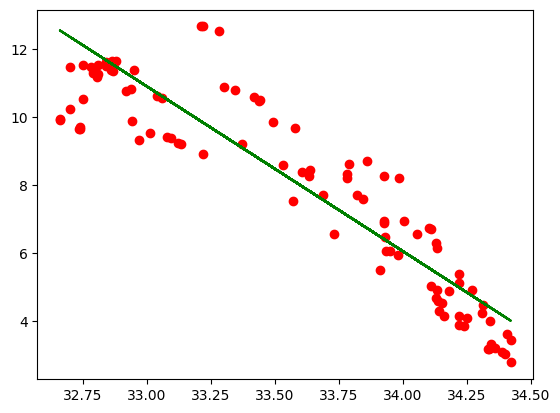

In [62]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, y_predict, color = 'g')
plt.show()

# Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_df = PolynomialFeatures(degree = 4)

In [68]:
transform_poly = poly_df.fit_transform(X_train)

In [69]:
linreg2 = LinearRegression()
linreg2.fit(transform_poly, y_train)

LinearRegression()

In [73]:
poly_pred = linreg2.predict(transform_poly)

In [74]:
rmse = np.sqrt(mean_squared_error(y_train,poly_pred))
r2 = r2_score(y_train,poly_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.8
R2 Score for Test set: 0.92


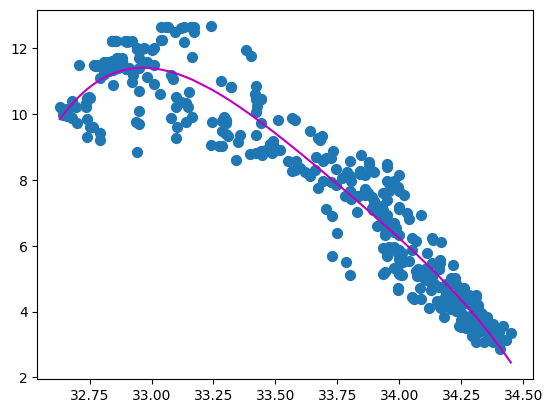

In [78]:
plt.scatter(X_train, y_train, s=50)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,poly_pred), key=sort_axis)
X_train, poly_pred = zip(*sorted_zip)
plt.plot(X_train, poly_pred, color = 'm')
plt.show()